In [1]:
# The following code is based on https://neptune.ai/blog/arima-sarima-real-world-time-series-forecasting-guide

import pandas as pd
pd.options.display.max_columns = None
from datetime import datetime

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

df = pd.read_csv('../../../output/landkreise/09777.csv', usecols=['dates', 'occupancy'], index_col=0, parse_dates=[0])
df.index.freq = 'D'
df

,occupancy
dates,
2020-04-24,13
2020-04-25,10
2020-04-26,9
2020-04-27,8
2020-04-28,9
...,...
2024-04-15,10
2024-04-16,13
2024-04-17,15


In [3]:
import matplotlib.pyplot as plt

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

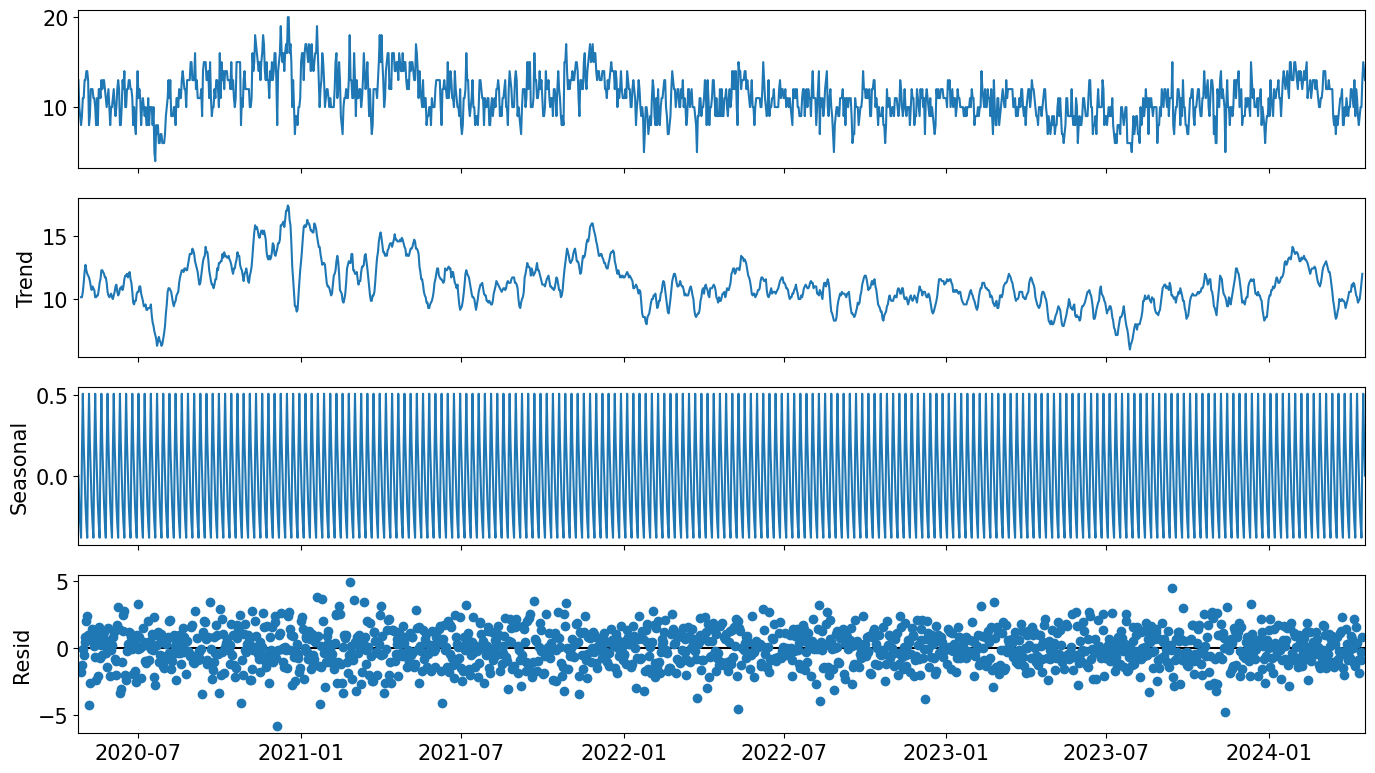

In [5]:
plt.rc('figure',figsize=(14,8))
plt.rc('font',size=15)

result = seasonal_decompose(df,model='additive')
fig = result.plot()

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

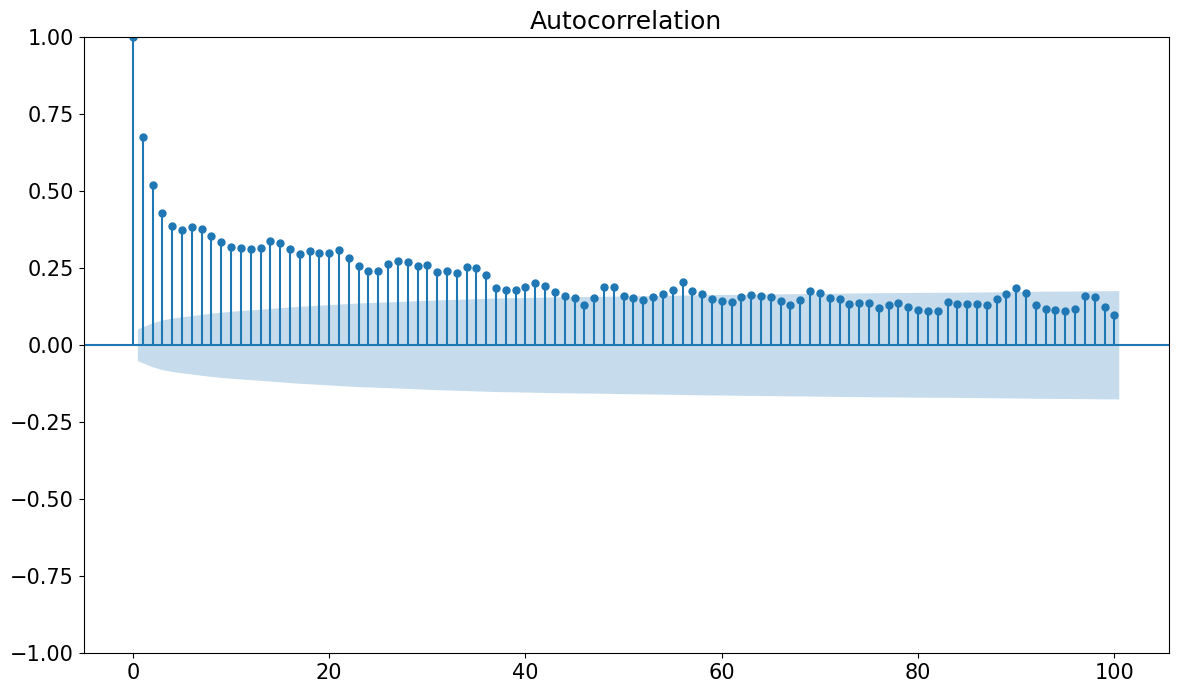

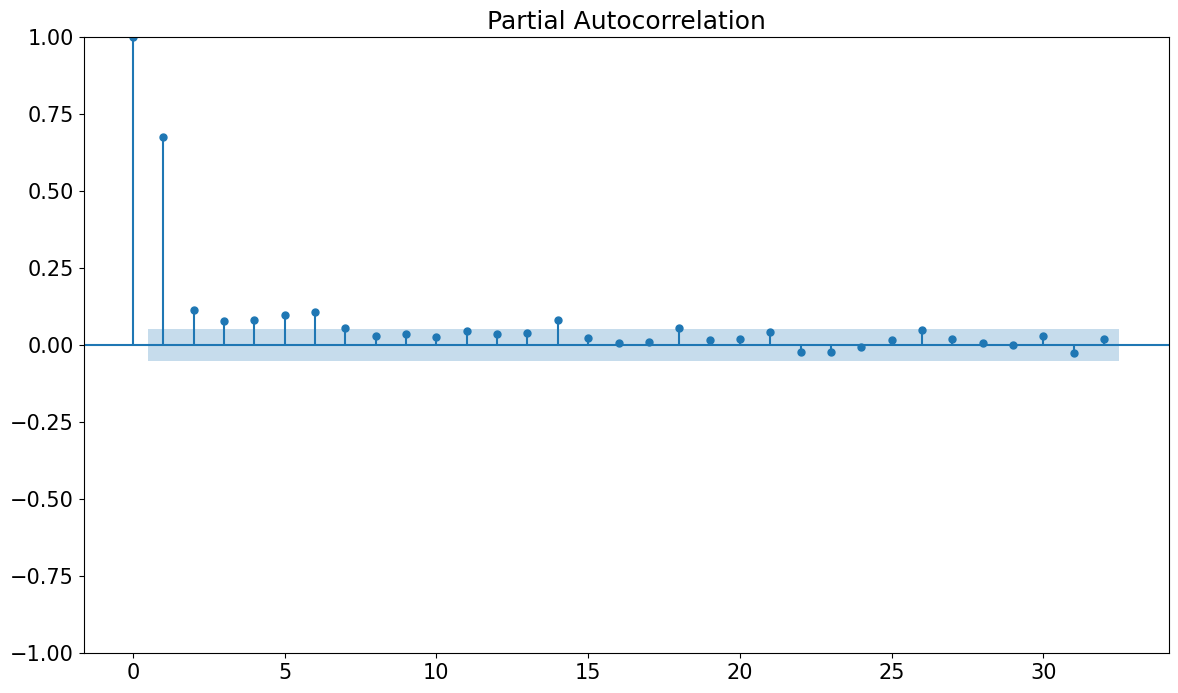

In [10]:
plot_acf(df['occupancy'], lags=100);
plot_pacf(df['occupancy']);

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
# dickey-fuller test
# check if data is stationary
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

check_stationarity(df['occupancy'])

The series is stationary


In [14]:
from statsmodels.tsa.arima.model import ARIMA

In [17]:
# p <= 2 because first 2 lags are meaningful according to PACF
# d = 0 because data is stationary
# q <= 42 because first 42 lags are meaningful according to ACF, q = 20 because of Maximum-Likelihood-Error with q >= 30
p, d, q = 2, 0, 20

arima = ARIMA(df['occupancy'], order=(p,d,q)) 
model_fit = arima.fit()
predictions = arima.fit().predict()

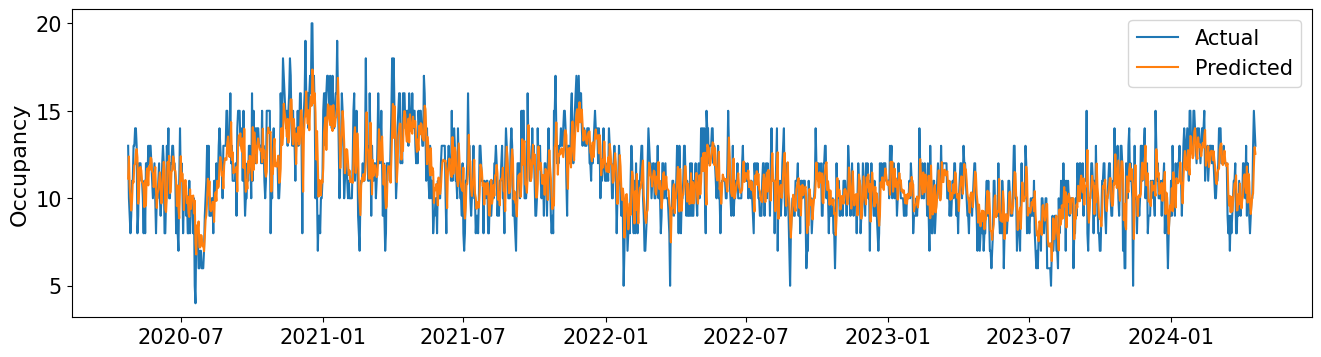

In [18]:
plt.figure(figsize=(16,4))
plt.plot(df, label="Actual") # No diff because we are working with stationary data
plt.plot(predictions, label="Predicted")
plt.ylabel('Occupancy', fontsize=16)
plt.legend()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error

In [20]:
rmse = root_mean_squared_error(df, predictions)
mape = mean_absolute_percentage_error(df, predictions)
[rmse, mape]

[1.6620716313051187, 0.12518200808458116]

In [21]:
# Splitting data into test and training data

train_data = df.iloc[:-30]
test_data = df.iloc[-30:]

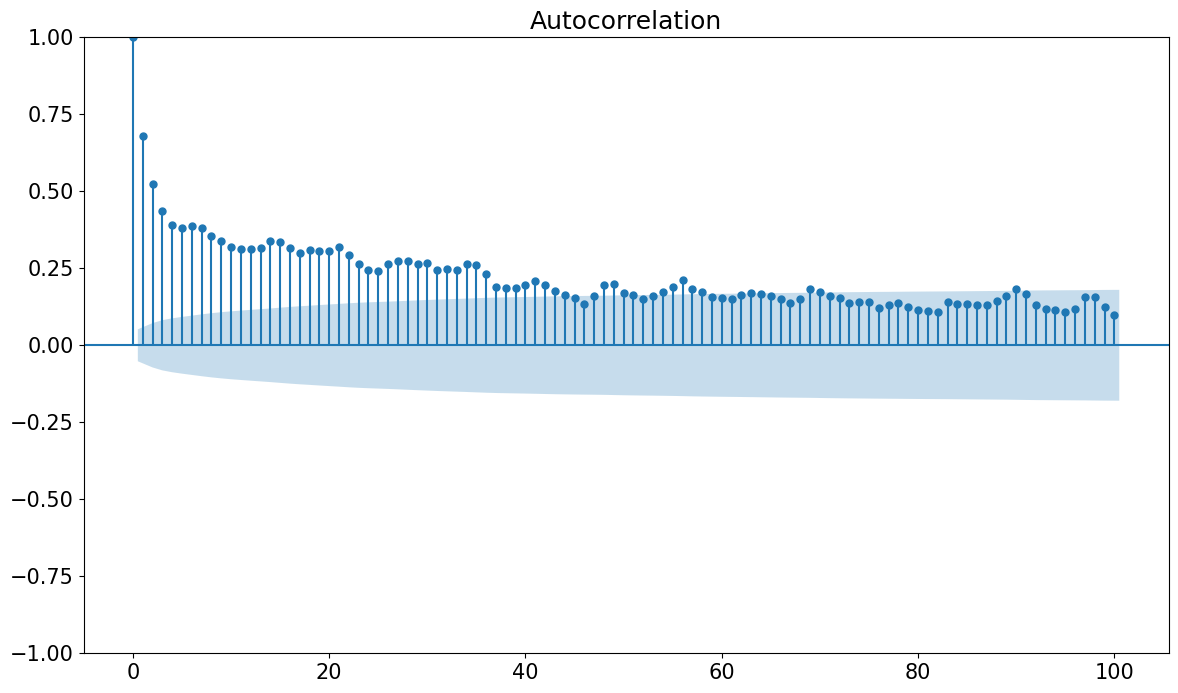

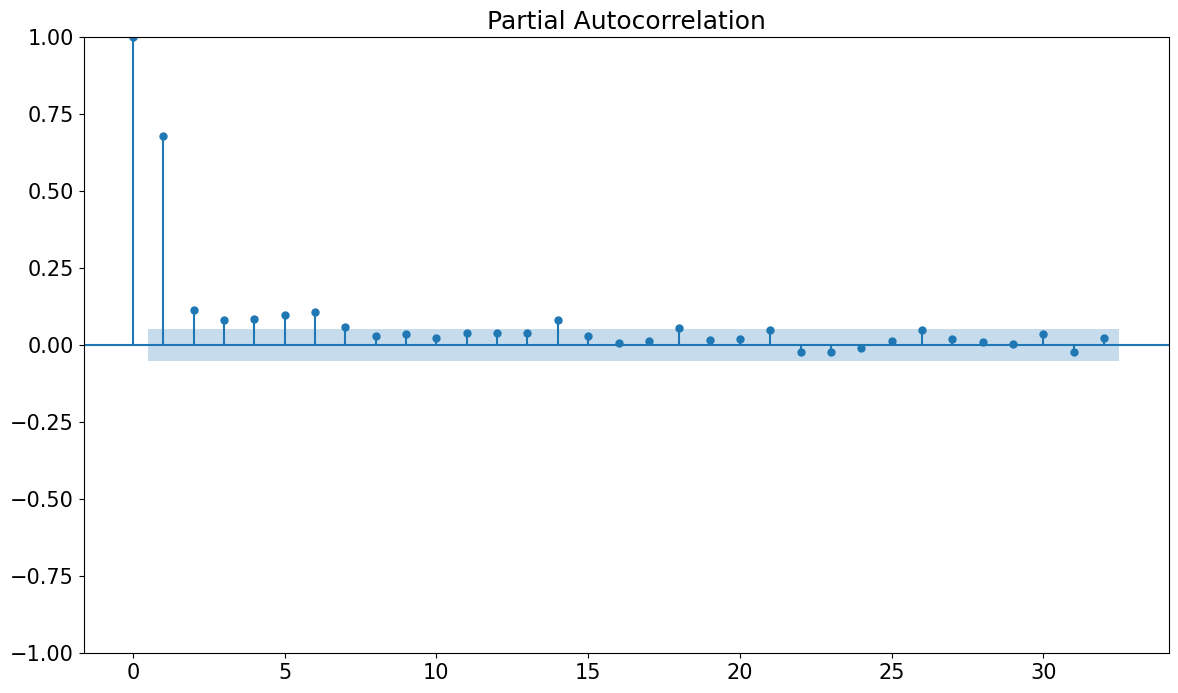

In [23]:
plot_acf(train_data['occupancy'], lags=100);
plot_pacf(train_data['occupancy']);

In [24]:
# p <= 2 because first 2 lags are meaningful according to PACF
# d = 0 because data is stationary
# q <= 42 because first 42 lags are meaningful according to ACF, q = 20 because of Maximum-Likelihood-Error with q >= 30
p, d, q = 2, 0, 20

arima_train_data = ARIMA(train_data['occupancy'], order=(p,d,q))
model_fit_train_data = arima_train_data.fit()

forecast_steps = 30
forecast_train_data = model_fit_train_data.forecast(steps=forecast_steps)

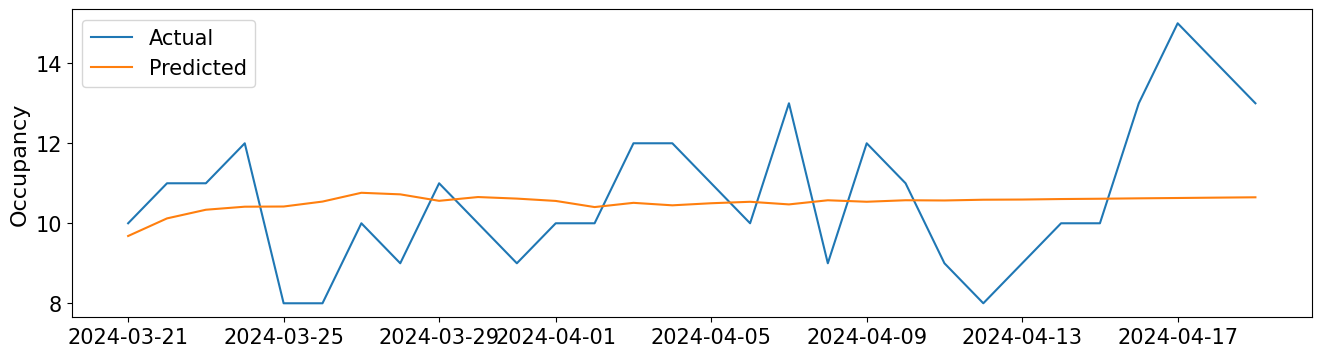

In [25]:
plt.figure(figsize=(16,4))
plt.plot(test_data, label="Actual") # No diff because we are working with stationary data
plt.plot(forecast_train_data, label="Predicted")
plt.ylabel('Occupancy', fontsize=16)
plt.legend()

In [26]:
rmse = root_mean_squared_error(test_data[:30], forecast_train_data)
mape = mean_absolute_percentage_error(test_data[:30], forecast_train_data)
[rmse, mape]

[1.7676434993790202, 0.1382445120099239]